<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

In [1]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 470, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 470 (delta 15), reused 9 (delta 2), pack-reused 437
Receiving objects: 100% (470/470), 149.64 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Checking out files: 100% (198/198), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 3.6 MB/s 


In [3]:
import os 
import numpy as np
from google.colab import files

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *
from CrispCerebella.Code.test_functions import *

In [22]:
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:", testX.shape, testy.shape)


Shape of test Data: (2947, 128, 9) (2947, 1)


In [6]:
y_labels = load_labels('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/y_test.txt')

In [7]:
acc_LSTM = "9104"
acc_CNNLSTM ="9100"
acc_ConvLSTM ="9015"

In [8]:
# unzip the folder of the model with a given accuracy
!unzip /content/CrispCerebella/Models/Final_Model_LSTM_{acc_LSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{acc_ConvLSTM}.zip 

Archive:  /content/CrispCerebella/Models/Final_Model_LSTM_9104.zip
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9104/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9104/saved_model.pb  
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9104/variables/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9104/variables/variables.data-00000-of-00001  
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9104/variables/variables.index  
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9104/assets/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9104/keras_metadata.pb  
Archive:  /content/CrispCerebella/Models/Final_Model_CNNLSTM_9100.zip
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9100/
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9100/saved_model.pb  
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9100/variables/
  inflating: content/CrispCerebella/Models/Final

In [9]:
# load the saved LSTM model
BestLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_LSTM_{acc_LSTM}')

{'LAYING': {'precision': 0.9933481152993349, 'recall': 0.9032258064516129, 'f1-score': 0.9461457233368532, 'support': 496}, 'SITTING': {'precision': 0.8324125230202578, 'recall': 0.9596602972399151, 'f1-score': 0.8915187376725838, 'support': 471}, 'STANDING': {'precision': 0.9051724137931034, 'recall': 1.0, 'f1-score': 0.9502262443438914, 'support': 420}, 'WALKING': {'precision': 0.8518518518518519, 'recall': 0.8431771894093686, 'f1-score': 0.8474923234390992, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.8974358974358975, 'recall': 0.8552631578947368, 'f1-score': 0.875842155919153, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 0.9959677419354839, 'recall': 0.9199255121042831, 'f1-score': 0.9564375605033882, 'support': 537}, 'accuracy': 0.9104173736002714, 'macro avg': {'precision': 0.9126980905559883, 'recall': 0.9135419938499861, 'f1-score': 0.9112771242024947, 'support': 2947}, 'weighted avg': {'precision': 0.9146485278040808, 'recall': 0.9104173736002714, 'f1-score': 

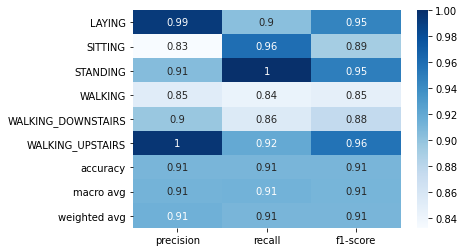

In [10]:
# Heatmap for the LSTM model
create_heatmap(BestLSTMModel, testX, testy, y_labels)

In [11]:
# load the saved CNNLSTM model
BestCNNLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}')

In [23]:
n_features =testX.shape[2]
n_steps, n_length = 4, 32
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

{'LAYING': {'precision': 0.9625779625779626, 'recall': 0.9334677419354839, 'f1-score': 0.9477993858751279, 'support': 496}, 'SITTING': {'precision': 0.9930875576036866, 'recall': 0.9150743099787686, 'f1-score': 0.9524861878453038, 'support': 471}, 'STANDING': {'precision': 0.8832271762208068, 'recall': 0.9904761904761905, 'f1-score': 0.9337822671156004, 'support': 420}, 'WALKING': {'precision': 0.8466386554621849, 'recall': 0.8207739307535642, 'f1-score': 0.8335056876938987, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.7996515679442509, 'recall': 0.8627819548872181, 'f1-score': 0.8300180831826403, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 0.9980430528375733, 'recall': 0.9497206703910615, 'f1-score': 0.9732824427480915, 'support': 537}, 'accuracy': 0.9100780454699695, 'macro avg': {'precision': 0.9138709954410776, 'recall': 0.912049133070381, 'f1-score': 0.9118123424101104, 'support': 2947}, 'weighted avg': {'precision': 0.913879082604274, 'recall': 0.9100780454699695

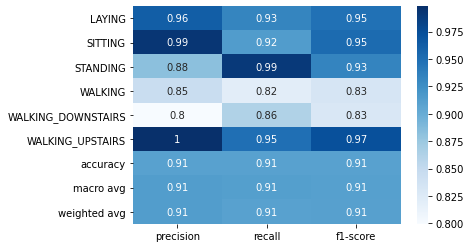

In [16]:
# Heatmap for the CNNLSTM model
create_heatmap(BestCNNLSTMModel, testX, testy, y_labels)

In [17]:
# load the saved ConvLSTM model
BestConvLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_ConvLSTM_{acc_ConvLSTM}')

In [24]:
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

{'LAYING': {'precision': 0.9099804305283757, 'recall': 0.9375, 'f1-score': 0.9235352532274081, 'support': 496}, 'SITTING': {'precision': 0.9160997732426304, 'recall': 0.8577494692144374, 'f1-score': 0.8859649122807017, 'support': 471}, 'STANDING': {'precision': 0.8862660944206009, 'recall': 0.9833333333333333, 'f1-score': 0.9322799097065463, 'support': 420}, 'WALKING': {'precision': 0.8938271604938272, 'recall': 0.7372708757637475, 'f1-score': 0.8080357142857143, 'support': 491}, 'WALKING_DOWNSTAIRS': {'precision': 0.8215488215488216, 'recall': 0.9172932330827067, 'f1-score': 0.8667850799289522, 'support': 532}, 'WALKING_UPSTAIRS': {'precision': 0.9905660377358491, 'recall': 0.9776536312849162, 'f1-score': 0.9840674789128397, 'support': 537}, 'accuracy': 0.9015948422124194, 'macro avg': {'precision': 0.9030480529950174, 'recall': 0.9018000904465234, 'f1-score': 0.9001113913903604, 'support': 2947}, 'weighted avg': {'precision': 0.903607776561452, 'recall': 0.9015948422124194, 'f1-score

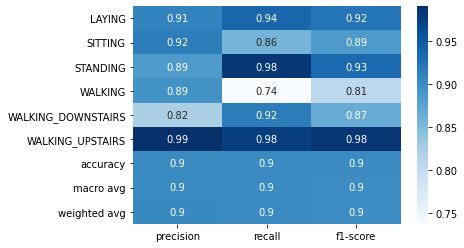

In [25]:
# Heatmap for the ConvLSTM model
create_heatmap(BestConvLSTMModel, testX, testy, y_labels)